In [29]:
##### Code catalog
##### 12/09/2023 - Organize from One-node-final folder. Github has another final version, compare and update later
#####
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import scipy
import scipy.io
import collections
import sys
import os
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm

from utils import *
from game import Game

## Configurations

In [30]:
network_name = 'karate'
# network_name = 'reddit'

np.set_printoptions(precision=3)

# Game Parameters
game_rounds = 5
memory = 0  # for zero-sum, the memory is always 0
experiment = 1
polarization_fn = obj_polarization

# Create the 'results' directory if it doesn't exist
os.makedirs('results', exist_ok=True)

## Creating Network
### 1. Import Network

In [31]:
network = import_network(network_name)

G, s, n = network.init()
nxG = nx.from_numpy_array(G)

There are 34 agents
[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


### 2. Network Visualization

<Figure size 2000x2000 with 0 Axes>

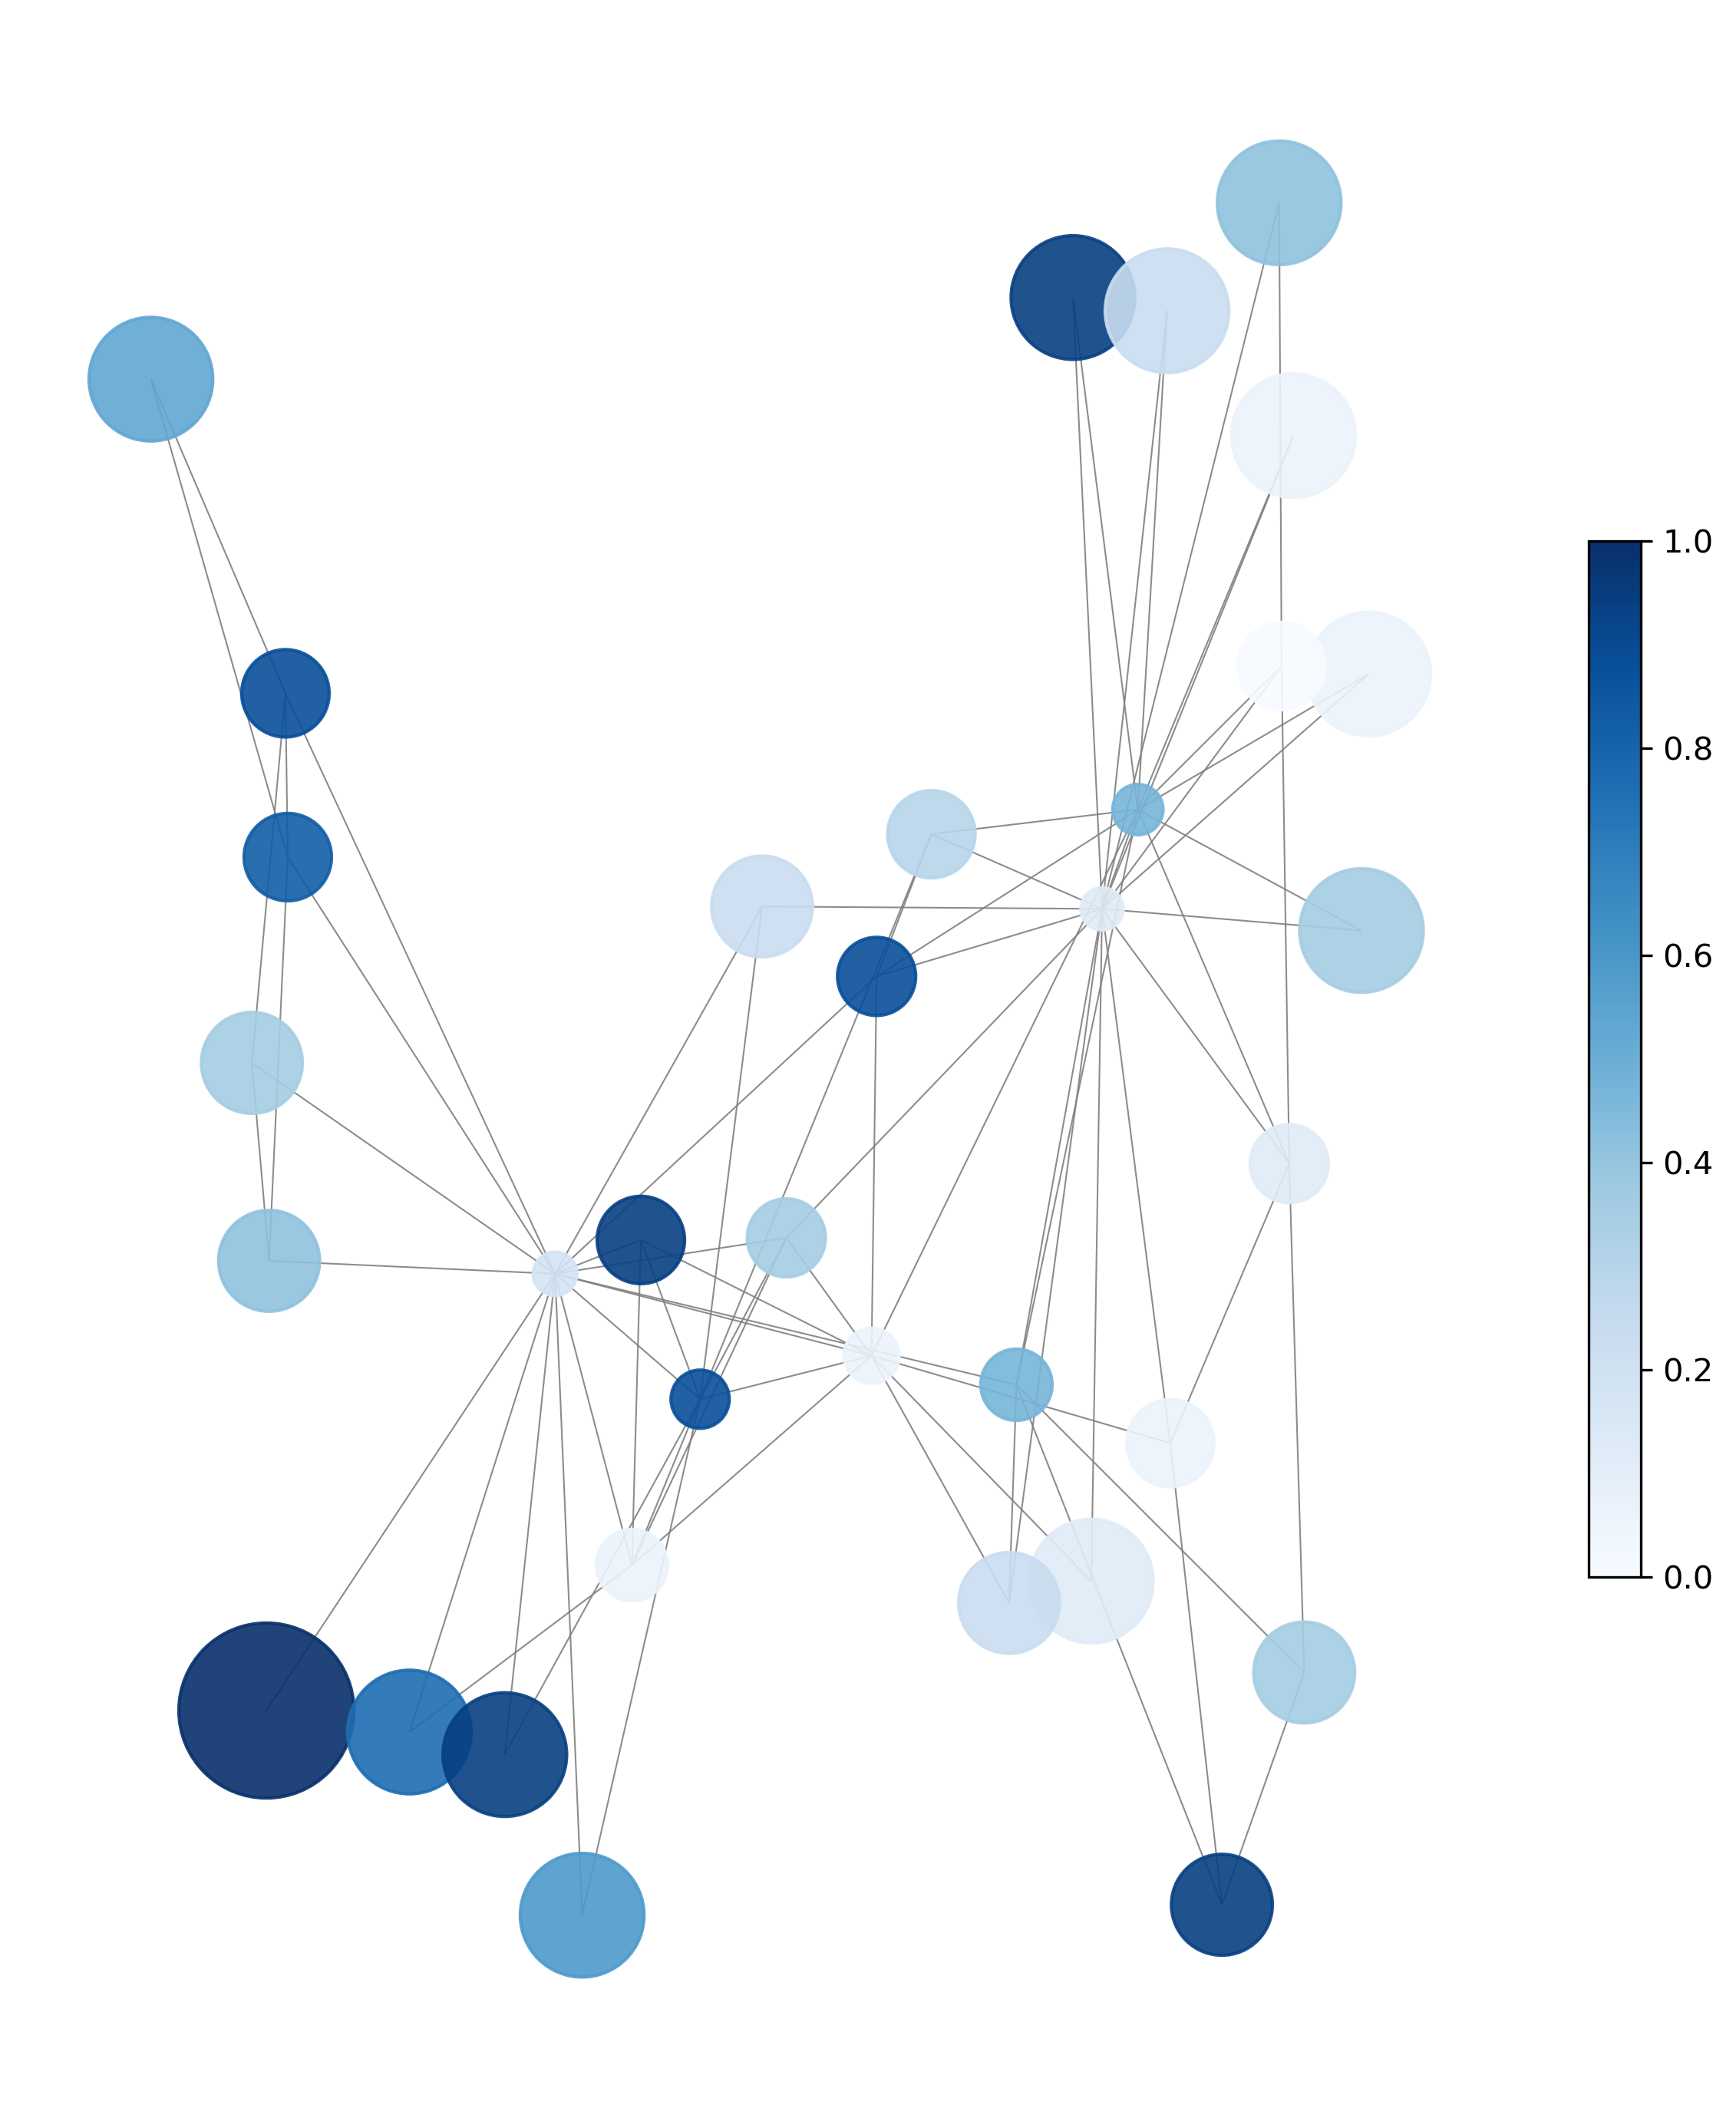

In [32]:
############################ Make Innate Opinion ################################

# Calculate Key Values & Visualization #######################################3
# the Laplacian matrix
L = scipy.sparse.csgraph.laplacian(G, normed=False)
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)  Adjacency Matrix
# call the function to calculate the number of edges
m = num_edges(L, n)
columnsum_ij = np.sum(A, axis=0)
plt.figure(figsize=(20, 20))


node_edges = get_node_edges(G, n)
min_equi = []
max_equi = []

# create color map
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi:
        color_map.append('Red')
    else:
        # color_map.append('#1f77b4')
        color_map.append('grey')

# create node color map value
# convert opinion array into data frame
s_use = s.flatten().tolist()
new_s = [i * 30 for i in s_use]
# create a data frame with index at column 1, opinion at column 2
df = pd.DataFrame(new_s, columns=['Opinion'])

# create node sizes
node_sizes = []
for i in node_edges:
    node_size = 1/i*3000
    node_sizes.append(node_size)

# visualize the network in high resolution
plt.figure(figsize=(8, 9), dpi=300)  # Set the DPI for high resolution
# draw subgraph for highlights
# set a seed so the network will not give random layout
my_pos = nx.spring_layout(nxG, k=0.3, seed=2)
nx.draw(nxG, pos=my_pos, with_labels=False, node_color=df['Opinion'].astype(int),
        cmap=plt.cm.Blues, node_size=node_sizes, edge_color='grey', width=0.5,
        font_color='black', font_size=12, font_weight='bold', alpha=0.9)
# nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.Blues,
    norm=plt.Normalize(vmin=0, vmax=1)
)

# visualize the network in high resolution
cbar = plt.colorbar(sm, shrink=0.5, ax=plt.gca())

### 3. Network Property Visualization

Text(0, 0.5, 'Number of Agents')

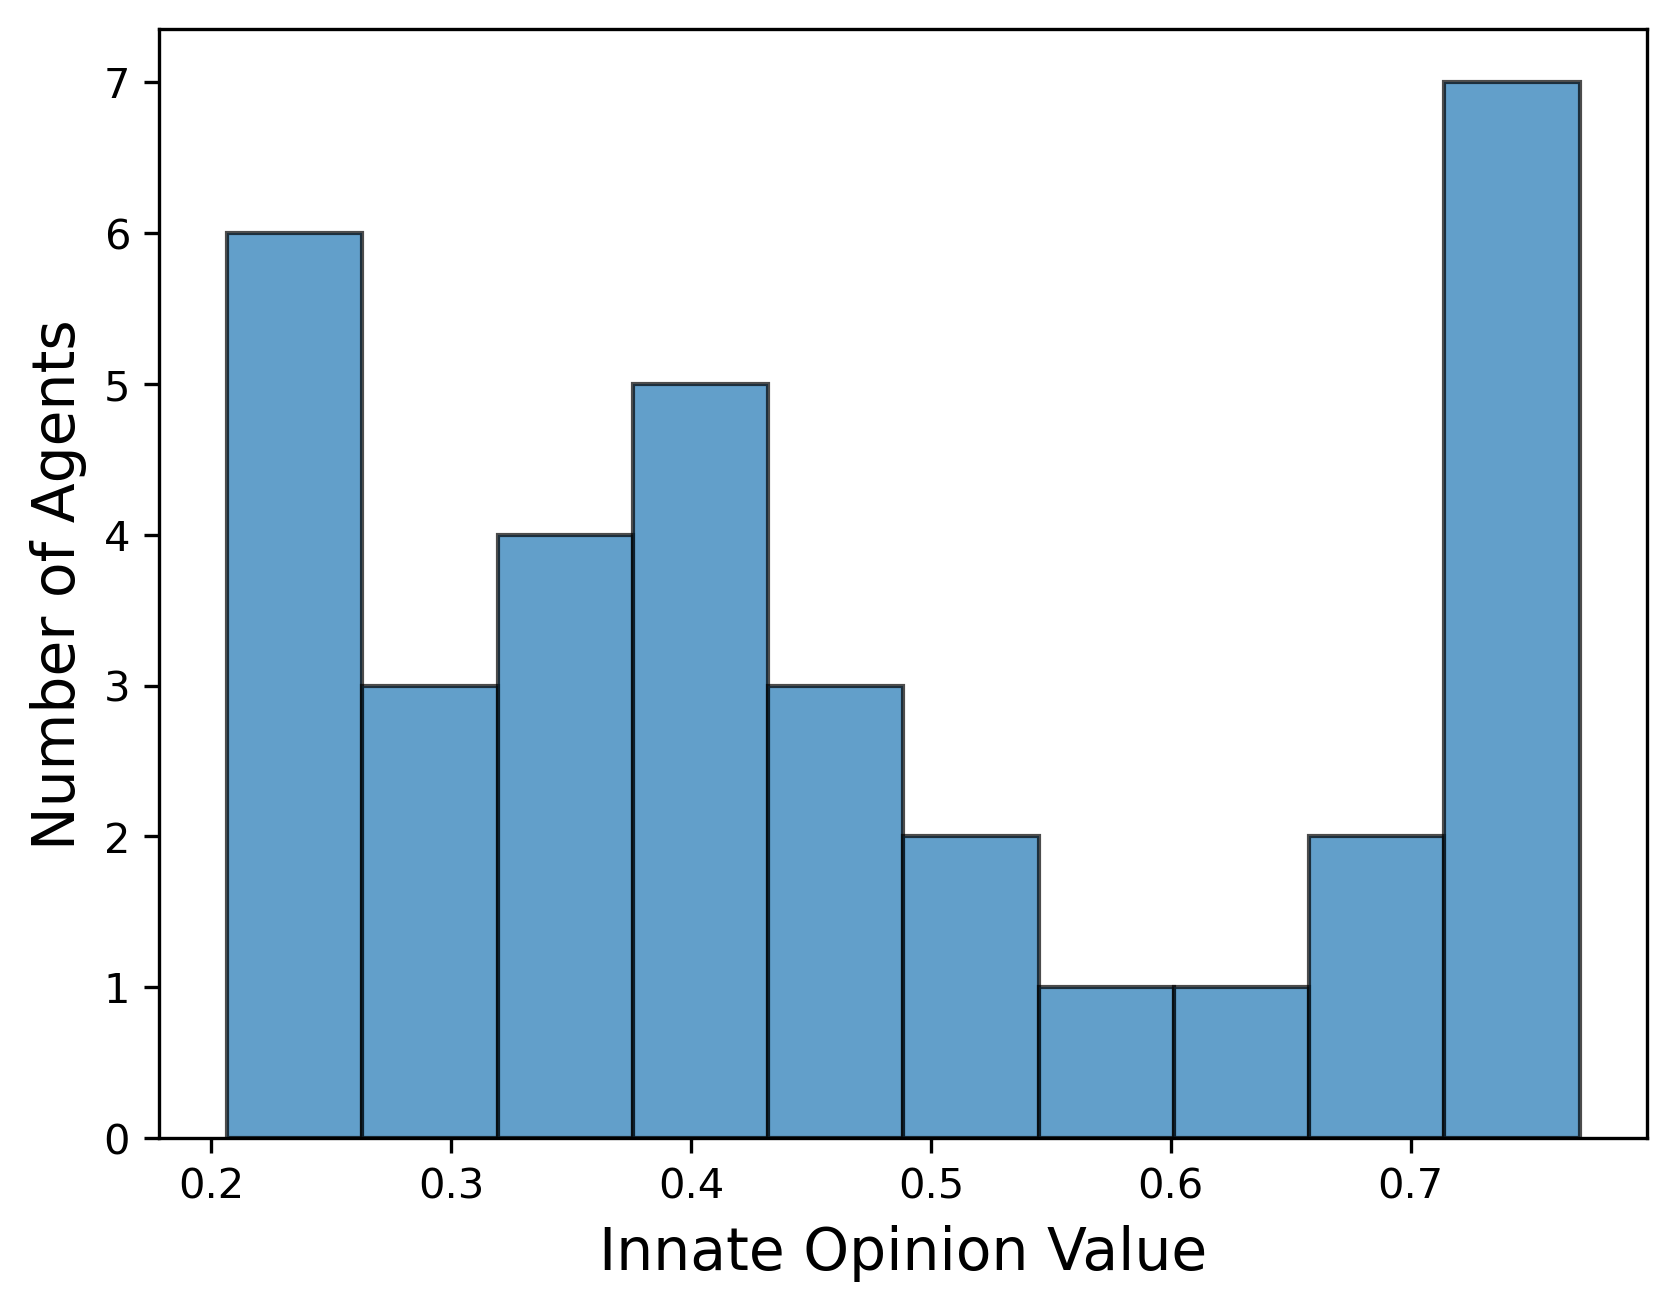

In [33]:
plt.figure(dpi=300)
# Create a histogram
plt.hist(s, bins=10, edgecolor='black', alpha=0.7)
# new_list = range(0, 3)
# plt.ylim(0,8)
# plt.yticks(range(0, 10, 2))
# Add labels and title
plt.xlabel('Innate Opinion Value', fontsize=14)
plt.ylabel('Number of Agents', fontsize=14)
# Save the figure as a high-quality PNG image
# plt.savefig(f'results/${network_type}_opinion_histograms.png', dpi=800)  # Adjust dpi for higher quality

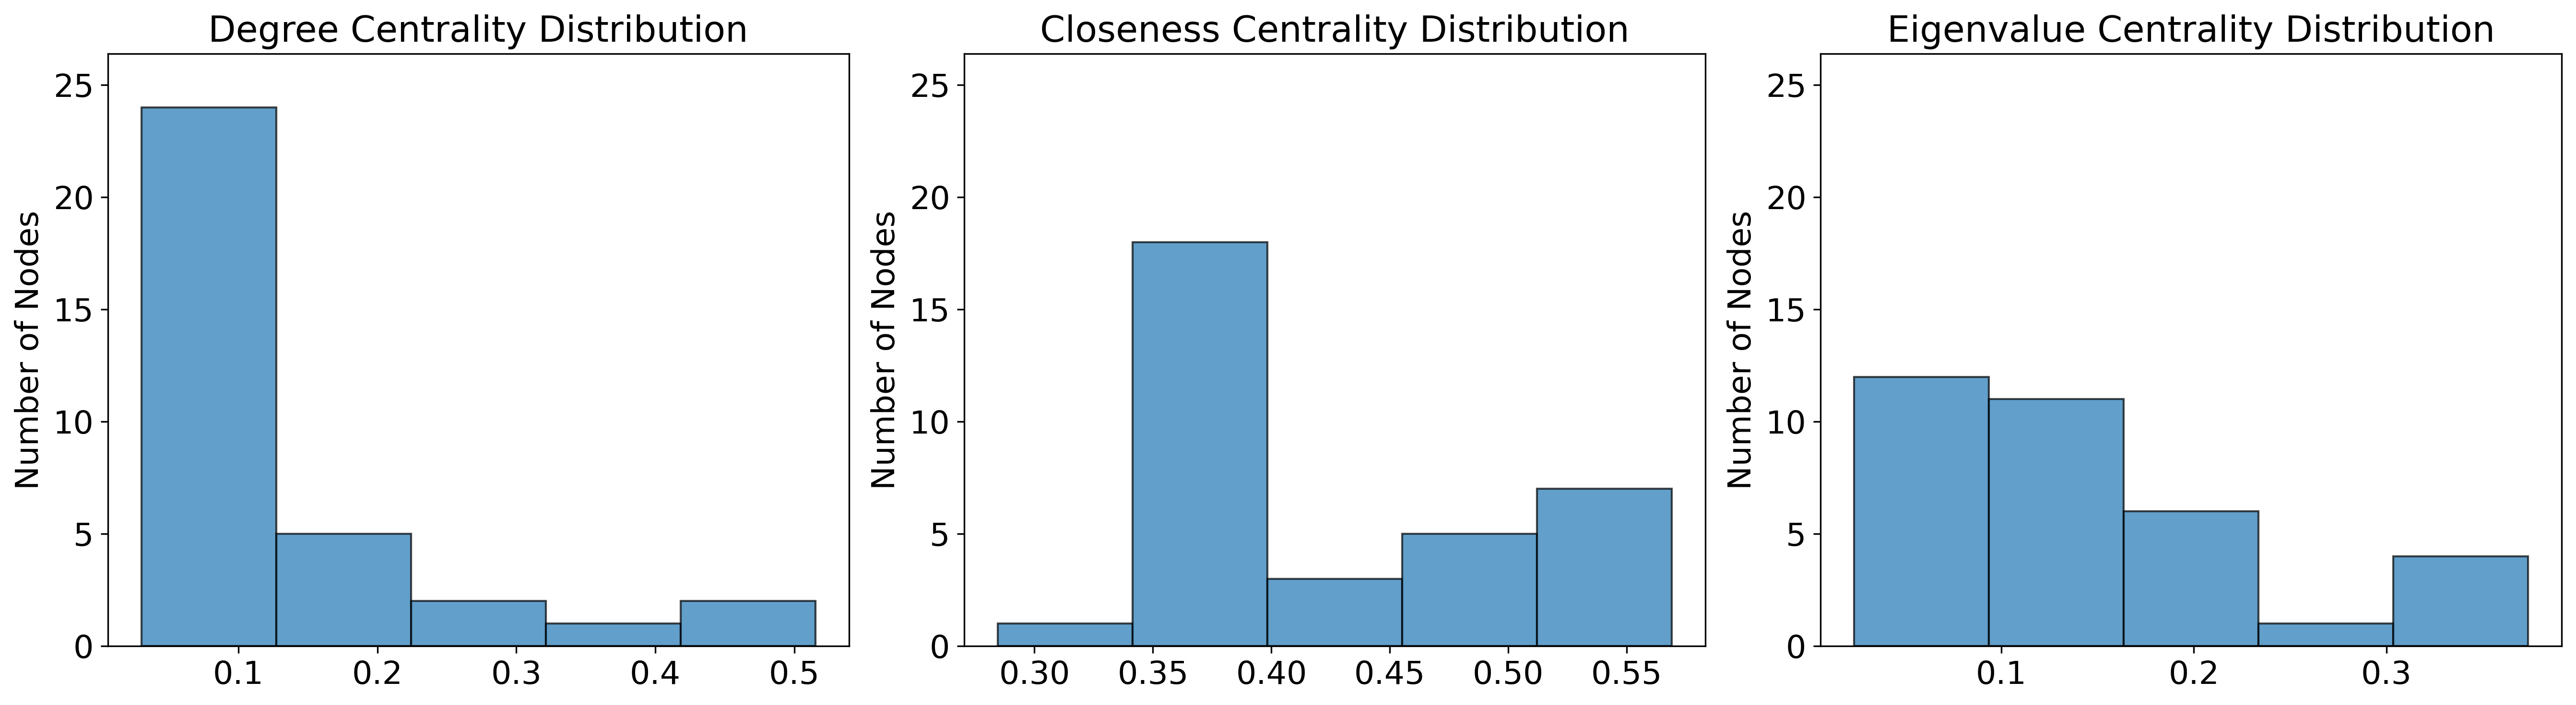

In [34]:
degree_df = calculate_centrality_and_convert_to_df(nxG, nx.degree_centrality)
closeness_df = calculate_centrality_and_convert_to_df(nxG, nx.closeness_centrality)
eigenvector_df = calculate_centrality_and_convert_to_df(nxG, nx.eigenvector_centrality)

bins = 5
# value of the highest bar
max_bar_value = max(
    pd.cut(degree_df[0], bins=5).value_counts().max(),
    pd.cut(closeness_df[0], bins=5).value_counts().max(),
    pd.cut(eigenvector_df[0], bins=5).value_counts().max(),
)
# pad top is added so that the highest bar doesn't touch the top border
ylim = max_bar_value + max_bar_value / 10

# Plot histograms of centrality measures in a horizontal layout
# Set DPI to 300 for higher resolution
fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=300)

plot_centrality_histogram(axs[0], degree_df, 'Degree Centrality Distribution', bins, ylim)
plot_centrality_histogram(axs[1], closeness_df, 'Closeness Centrality Distribution', bins, ylim)
plot_centrality_histogram(axs[2], eigenvector_df, 'Eigenvalue Centrality Distribution', bins, ylim)

plt.tight_layout()
# Save the figure as a high-quality PNG image
# Adjust dpi for higher quality
plt.savefig(f'results/{network_name}_centrality_histograms.png', dpi=800)

plt.show()

In [35]:
# Analyze node feature
nod_ind = 29  # index of node - start with 0

network_anl(s, n, G, nod_ind)
print(f"Minimum Eigen_value Centrality: {np.min(eigenvector_df)}")
print(f"Maximum opinion: {min(s)}")

29 opinion: [0.207]
29 neighbors: (array([23, 26, 32, 33]),)
Opinion rank of this agent is: 1
_______________Degree Centrality___________________
rank of this agent is:	20
0.12121212121212122

_______________Closeness Rank________________________
rank of this agent is:	17
0.38372093023255816

_______________Page Rank_____________________________
rank of this agent is:	22
0.13496528673866567
Agent's opinion extremity is ranked as:	1
Agent's min_pref is ranked as:	21
Minimum Eigen_value Centrality: 0.02363479426059687
Maximum opinion: [0.207]


### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [36]:
# Calculate network properties
polarization_properties(s, n, A)

Innate_polarization:	1.1743186020487546
Equi_polarization:	0.15967526924290512
Difference:		-1.0146433328058495


### 5. Innate Op and Game

# Fictitious Play Start !


### Prepare for the game

In [37]:
game = Game(s, A, L, calculate_polarization=polarization_fn)
gameResult = game.run(game_rounds, memory)

    Agent32's opinion 0.4877651933335371 changed to 0.6106725701318373
Network reaches equilibrium Polarization: 0.15269368732106453
fre_max at spot: 1.0
    Agent18's opinion 0.3518122646975705 changed to 0.7212721269711561
Network reaches equilibrium Polarization: 0.14448460577881275
v1 32
v2 18
min_history: [(18, 0.7212721269711561)]
Counter({(18, 0.7212721269711561): 1})
fla_min_fre at the spot
min_counter: {(18, 0.7212721269711561): 1}
1
_____________________
Game 1
_____________________
Maximizer finds its target agent
    Agent16's opinion 0.5120312044870241 changed to 1
pop
Minimizer found its target agent
    Agent6's opinion 0.720404905537744 changed to 0.005748080607403221
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1612667243236749 and Equi_Max = 0.24080710865388513
_____________________
Game 2
_____________________
Maximizer finds its target agent
    Agent16's opinion 0.5120312044870241 changed to 1
pop
Minimizer found its target agent
    Agent6's opinion 0.72040490

In [38]:
# # MAXimizer's distribution of LAST 100 iteration
# print('Max_distribution_last_100')
# max_l100_fre = max_history_last_100/500
# print(max_l100_fre [np.nonzero(max_l100_fre)])
# print(np.nonzero(max_l100_fre))

max_fre = gameResult.max_history/game_rounds
print(max_fre[np.nonzero(max_fre)])
print('Max_distribution_all')
print([np.nonzero(max_fre)])
# print for small network
# # Print for Large Network
# print(np.nonzero(max_l100_fre))

print("__________________________________________")

# # MINimizer's Strategy in the last 100 round
# print('Min_distribution_last_100')
# counter_h=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
# print(counter_h.keys())
# counter=collections.Counter(min_touched_last_100)
# fla_min_fre = np.array(list(counter.values()))/(500) #return only frequency of all min options in order
# print('fla_min_fre')
# print(fla_min_fre)
# print(min_touched_last_100)

# return a dictionary include {'min_option': count of this choice}
counter_1h = collections.Counter(gameResult.min_history)
# print(counter_1h.keys())
# return a dictionary include {'min_option': count of this choice}
counter_1 = collections.Counter(gameResult.min_touched_all)

# return only frequency of all min options in order
fla_min_fre_1 = np.array(list(counter_1.values()))/game_rounds
print('Min_distribution_all')
print(fla_min_fre_1)
print(counter_1)

# print(counter_1h)

[0.8 0.2 0.2]
Max_distribution_all
[(array([16, 26, 32]), array([1, 0, 0]))]
__________________________________________
Min_distribution_all
[0.6 0.4]
Counter({6: 3, 16: 2})


## Save the Network and Game Result to the file

In [39]:
# Save the files
pd.DataFrame(gameResult.payoff_matrix).to_csv(f'results/Karate Payoff Matrix{experiment}.csv')
pd.DataFrame(gameResult.min_touched_all).to_csv(f'results/Karate Min Overall{game_rounds}.csv')
pd.DataFrame(gameResult.min_history).to_csv(f'results/Karate Min agent & op Overall{game_rounds}.csv')
pd.DataFrame(gameResult.max_history).to_csv(f'results/Karate Max Overall {game_rounds}.csv')

# Save the original standard output
original_stdout = sys.stdout

with open(f'results/Result{network_name.capitalize()}.{experiment}Pure.txt', "w") as f:
    # Change the standard output to the file we created.
    sys.stdout = f

    # print(experiment_note)
    print('Initial Condition -(agent, opinion, pol)')
    print(f'Innate op {s}')
    print(f'Adjacency matrix {G}')
    print(f'Max:\t{gameResult.first_max}')
    print(f'Min:\t{gameResult.first_min}')

    print("In the Last 100 Rounds")
    print('_____________________')

    # MAX distribution of LAST 100 iteration
    print('Max_distribution')
    max_l100_fre = gameResult.max_history_last_100/100
    print(max_l100_fre[np.nonzero(max_l100_fre)])
    # print for small network
    # print(max_history_last_100)
    # # Print for Large Network
    print(np.nonzero(max_l100_fre))

    # MIN Strategy in the last 100 round
    # return a dictionary include {'min_option': count of this choice}
    counter = collections.Counter(gameResult.min_touched_last_100)
    # print(counter)
    # return only frequency of all min options in order
    fla_min_fre = np.array(list(counter.values()))/100
    # print('Min_frequency')
    # print(list(counter.keys()))
    print('Min_distribution_last_100')
    print(fla_min_fre)
    # return a dictionary include {'min_option': count of this choice}
    counter_h = collections.Counter(gameResult.min_history_last_100)
    print(counter_h)

    # then stop at Game 202
    print(f'min_recent_{memory}_touched:\t{gameResult.min_touched}')
    print(f'max_recent_{memory}_touched:\t{gameResult.max_touched}')

    print(f'In Overall {game_rounds} Rounds')
    print('_____________________')

    max_fre = gameResult.max_history/game_rounds
    # print(f'Max_frequency: {max_history}')
    print('Max_distribution')
    print(max_fre[np.nonzero(max_fre)])
    print(np.nonzero(max_fre))

    # Min Strategy in the Overall
    # return a dictionary include {'min_option': count of this choice}
    counter_1 = collections.Counter(gameResult.min_touched_all)
    # return only frequency of all min options in order
    fla_min_fre_all = np.array(list(counter_1.values())) / game_rounds
    print('Min_dist_all')
    print(fla_min_fre_all)
    print('Min_distribution')
    # return a dictionary include {'min_option': count of this choice}
    counter_a = collections.Counter(gameResult.min_history)
    print(counter_a)
    # print(payoff_matrix)

# Reset the standard output to its original value
sys.stdout = original_stdout

In [40]:
counter = collections.Counter(gameResult.min_history)
print(f'counter:\t{counter}')
fla_min_fre = np.array(list(counter.values()))/game_rounds
print(f'fla_min_fre:\t{fla_min_fre}')

counter:	Counter({(6, 0.0): 2, (18, 0.7212721269711561): 1, (6, 0.01): 1, (16, 0.51): 1, (16, 0.15): 1})
fla_min_fre:	[0.2 0.2 0.4 0.2 0.2]
